In [49]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import glob
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
from scipy.stats import ranksums
from scipy.stats import skew
from scipy.stats import kurtosis, skew
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys

In [50]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object


def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
        

In [51]:
def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected

In [52]:
def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista

In [53]:
def compute_best_scores(lista):    

    values = []
    critical = []
    final = [] 
    
    for l in lista:
        ok = l.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(num)

    for value in values:
        if float(value) < 0.05:
            critical.append(value)

    for li in lista:
        for cri in critical:
            if cri in li:
                final.append(li)

    return final

In [54]:
word_analysis = []
path = os.listdir("/export/b15/afavaro/Frontiers/GITA_NEW_TASKS/Alignment/")
print(len(path))
for elem in path:

        word_analysis.append(os.path.join('/export/b15/afavaro/Frontiers/GITA_NEW_TASKS/Alignment/', elem))

699


In [55]:
list_of_dataframes = []
for element in word_analysis:
    participant = pd.read_csv(element)
    elem = os.path.basename(element)
    total = elem.split(".csv")[0]
    name = elem.split('_', 1)[1]
    name = name.split("_")[0]
    label = elem.split("_")[0]
    task = (elem.split("_", 1)[1])
    task= task.split("_", -1)[1]
    #task = task[:-4]
    
   # rt = participant.Time.tolist()[0]
    tot= participant.time_stamp.tolist()
    tot = (list(set(tot)))
    unique = participant['time_stamp'].unique()
    stdx = unique.std()
    kurtx = kurtosis(unique)
    skewx =  skew(unique)

    #skew =  participant['time_stamp'].unique().skew()
    dict = {'total': total, 'name': name, 'label': label, 'tasks': task, 'rhythm_std': stdx,'rhythm_skew': skewx, 'rhythm_kurt': kurtx} # 'Rhythm_kurt': kurtosis, 
    df = pd.DataFrame(dict, index=[0])
    list_of_dataframes.append(df)

data_ = pd.concat(list_of_dataframes, ignore_index=True)
data_ = data_.dropna()

In [56]:
#data_.to_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/GITA/cognitive/RHYTHM_DATAFRAME_new_tot.csv")

In [57]:
data_['task']=[elem.split("_")[2] for elem in data_['total'].tolist()]
data_

,total,name,label,tasks,rhythm_std,rhythm_skew,rhythm_kurt,task
0,CN_AVPEPUDEAC0001_laura,AVPEPUDEAC0001,CN,laura.csv,0.546219,-0.420468,-0.407961,laura
1,CN_AVPEPUDEAC0001_loslibros,AVPEPUDEAC0001,CN,loslibros.csv,1.133582,-0.603156,-1.275354,loslibros
2,CN_AVPEPUDEAC0001_luisa,AVPEPUDEAC0001,CN,luisa.csv,0.995301,-0.781415,-0.668067,luisa
3,CN_AVPEPUDEAC0001_micasa,AVPEPUDEAC0001,CN,micasa.csv,0.684137,0.106928,-1.211172,micasa
4,CN_AVPEPUDEAC0001_rosita,AVPEPUDEAC0001,CN,rosita.csv,1.074347,0.106904,-1.069499,rosita
...,...,...,...,...,...,...,...,...
694,PD_042_monologue_PCGITA,042,PD,monologue,6.874309,-0.116284,-1.063643,monologue
695,CN_085_monologue_PCGITA,085,CN,monologue,5.183033,-0.173188,-1.378294,monologue
696,PD_049_monologue_PCGITA,049,PD,monologue,19.890723,0.027826,-1.254092,monologue
697,CN_092_monologue_PCGITA,092,CN,monologue,9.757142,0.131811,-1.081562,monologue


In [58]:
task_grouped_= data_.groupby('tasks')
read = task_grouped_.get_group("readtext.csv")
luisa = task_grouped_.get_group("luisa.csv")
loslibros = task_grouped_.get_group("loslibros.csv")
micasa = task_grouped_.get_group("micasa.csv")
rosita = task_grouped_.get_group("rosita.csv")
laura = task_grouped_.get_group("laura.csv")
monog= task_grouped_.get_group("monologue")


TDU = pd.concat([luisa, loslibros, rosita,monog,laura ])

## Read Passage 

In [59]:
grouped = read.groupby('label')
control = grouped.get_group('HC') 
parkinson = grouped.get_group("PD")

task = read.columns[4:-1].values.tolist()

parkinson_all_feat = np.array([parkinson[feat] for feat in np.array(read.columns[4:-1])])
control_all_feat = np.array([control[feat] for feat in np.array(read.columns[4:-1])])


with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/rhythm_read.txt', 'w') as f:
 
    kruskal(f, task, parkinson_all_feat, control_all_feat, "controls vs.", "parkinson")
    


kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/rhythm_read.txt')
holm_correction(kruskal_1)


([], [])

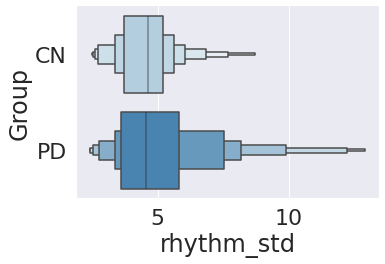

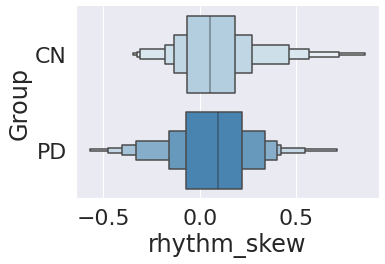

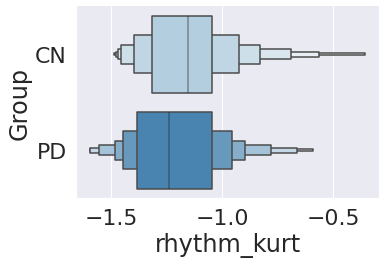

In [60]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
   

## Monologue

In [61]:
grouped = monog.groupby('label')
control = grouped.get_group('CN') 
parkinson = grouped.get_group("PD")

task = monog.columns[4:-1].values.tolist()

parkinson_all_feat = np.array([parkinson[feat] for feat in np.array(monog.columns[4:-1])])
control_all_feat = np.array([control[feat] for feat in np.array(monog.columns[4:-1])])



with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/rhythm.txt', 'w') as f:
 
    kruskal(f, task, parkinson_all_feat, control_all_feat, "controls vs.", "parkinson")
    


kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/rhythm.txt')
holm_correction(kruskal_1)

([], [])

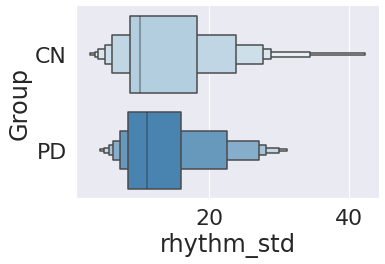

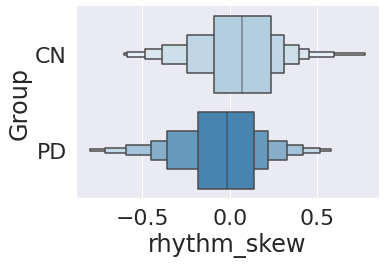

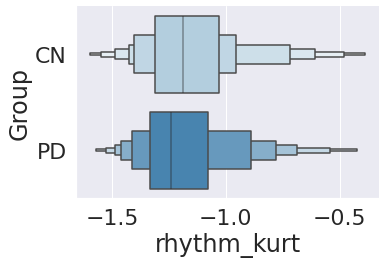

In [62]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
        
   # plt.savefig(f'/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/luisa_{nome}.png', facecolor='white', dpi=600)
        
    

## Text Dependent Utterances (TDU)

In [63]:
grouped = TDU.groupby('label')
control = grouped.get_group('CN') 
parkinson = grouped.get_group("PD")

task = TDU.columns[4:-1].values.tolist()

parkinson_all_feat = np.array([parkinson[feat] for feat in np.array(TDU.columns[4:-1])])
control_all_feat = np.array([control[feat] for feat in np.array(TDU.columns[4:-1])])



with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/rhythm_TDU.txt', 'w') as f:
 
    kruskal(f, task, parkinson_all_feat, control_all_feat, "controls vs.", "parkinson")
    


kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/rhythm_TDU.txt')
holm_correction(kruskal_1)

([], [])

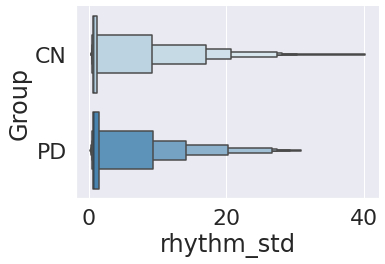

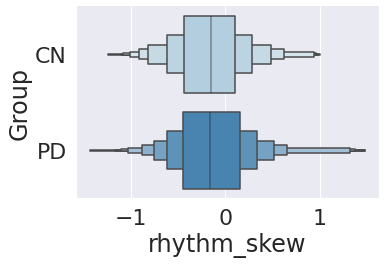

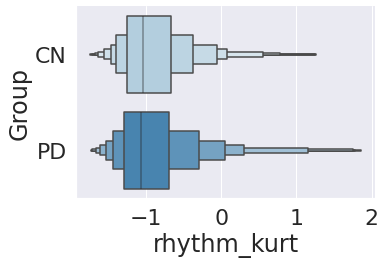

In [64]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
        
  #  plt.savefig(f'/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/luisa_{nome}.png', facecolor='white', dpi=600)
        
    